# **Weather Prediction**

In [41]:
#Data Analysing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [42]:
df = pd.read_csv('/content/weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [44]:
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,1485
MaxTemp,1261
Rainfall,3261
Evaporation,62790
Sunshine,69835
WindGustDir,10326
WindGustSpeed,10263
WindDir9am,10566


In [45]:
#since this column have more null valuesss
df = df.drop(['Sunshine'],axis=1)

In [46]:
for col in df.columns:
    print(f"Column: {col} | Total Rows: {df.shape[0]} | Null Values: {df[col].isnull().sum()}")

Column: Date | Total Rows: 145460 | Null Values: 0
Column: Location | Total Rows: 145460 | Null Values: 0
Column: MinTemp | Total Rows: 145460 | Null Values: 1485
Column: MaxTemp | Total Rows: 145460 | Null Values: 1261
Column: Rainfall | Total Rows: 145460 | Null Values: 3261
Column: Evaporation | Total Rows: 145460 | Null Values: 62790
Column: WindGustDir | Total Rows: 145460 | Null Values: 10326
Column: WindGustSpeed | Total Rows: 145460 | Null Values: 10263
Column: WindDir9am | Total Rows: 145460 | Null Values: 10566
Column: WindDir3pm | Total Rows: 145460 | Null Values: 4228
Column: WindSpeed9am | Total Rows: 145460 | Null Values: 1767
Column: WindSpeed3pm | Total Rows: 145460 | Null Values: 3062
Column: Humidity9am | Total Rows: 145460 | Null Values: 2654
Column: Humidity3pm | Total Rows: 145460 | Null Values: 4507
Column: Pressure9am | Total Rows: 145460 | Null Values: 15065
Column: Pressure3pm | Total Rows: 145460 | Null Values: 15028
Column: Cloud9am | Total Rows: 145460 | Nul

In [47]:
# drop columns with >40% missing
df.drop(["Evaporation","Cloud9am","Cloud3pm"], axis=1, inplace=True)

# fill numerical missing values
num_cols = ["MinTemp","MaxTemp","Rainfall","WindSpeed9am","WindSpeed3pm","WindGustSpeed",
            "Humidity9am","Humidity3pm","Temp9am","Temp3pm","Pressure9am","Pressure3pm"]

for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# fill categorical missing values
cat_cols = ["WindGustDir","WindDir9am","WindDir3pm","RainToday"]
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# remove rows with missing target values
df = df.dropna(subset=["RainTomorrow"])

In [48]:
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
WindGustDir,0
WindGustSpeed,0
WindDir9am,0
WindDir3pm,0
WindSpeed9am,0


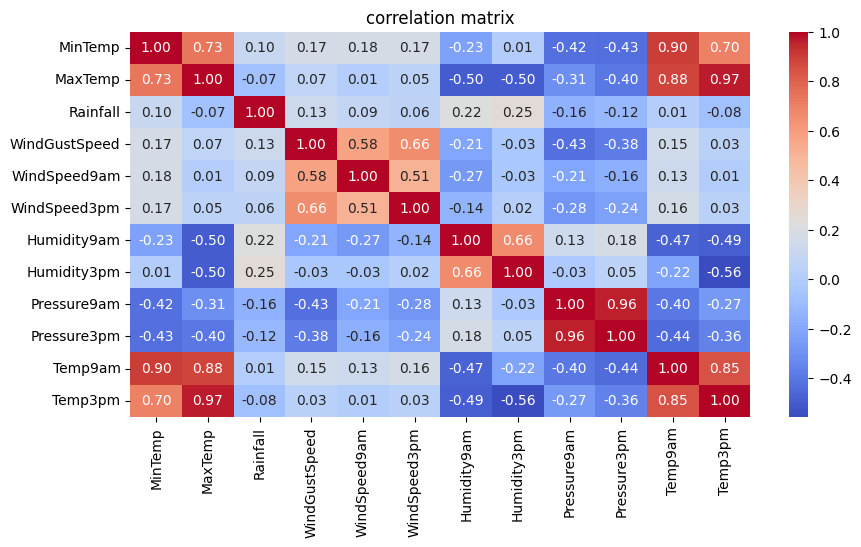

In [49]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm',fmt=".2f")
plt.title("correlation matrix")
plt.show()

In [50]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [51]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

categorical_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)

Numerical Columns: ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']
Categorical Columns: ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [75]:
numeric_features = ['Humidity3pm', 'Humidity9am', 'Pressure9am', 'WindGustSpeed', 'MinTemp']
categorical_features = ['Location'] #one hot encoding

In [76]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
numeric_features.append('Month') # Add Month to numeric list

In [77]:
X = df[numeric_features + categorical_features]
y = df['Rainfall']

In [78]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('regressor', LinearRegression())])

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
model_pipeline.fit(X_train, y_train)
y_test_pred = model_pipeline.predict(X_test)

In [82]:
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)

print("------- Test Data Evaluation -------")
print(f"Mean Absolute Error (MAE):  {mae:.4f}")
print(f"Mean Squared Error (MSE):   {mse:.4f}")
print(f"Root Mean Sq Error (RMSE):  {rmse:.4f}")
print(f"R-Squared (R2):             {r2:.4f}")

------- Test Data Evaluation -------
Mean Absolute Error (MAE):  3.5403
Mean Squared Error (MSE):   61.9174
Root Mean Sq Error (RMSE):  7.8688
R-Squared (R2):             0.1285
